# Desafio Codenation 
Link do desafio: https://www.codenation.dev/aceleradev/ds-online-1/challenge/enem-ps

# Descrição do desafio

Descubra as melhores notas de matemática do ENEM 2016

Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016. 

### Detalhes

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação. Determine os 20 melhores colocados, por ordem, para os pesos abaixo:

- matemática: 3
- ciências da natureza: 2
- linguagens e códigos: 1.5
- ciências humanas: 1
- redação: 3

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna **NU_NOTA_MT**) de quem participou do ENEM 2016. 

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: **NU_INSCRICAO** e **NU_NOTA_MT**.

Faça o upload do arquivo answer.csv usando o botão "Submeter resposta".

## Observações

O objetivo do desafio é avaliar a sua capacidade de resolver problemas, então ele pode ser resolvido em qualquer linguagem de programação ou ferramenta que você tenha facilidade. Mas recomendamos o uso de linguagens com maior ferramental de matemática e estatística como Python, R, Scala ou Julia.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
arq = pd.read_csv('train.csv')

In [5]:
arq.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [6]:
colunas = ['TP_COR_RACA',
           'TP_ESCOLA',
           'IN_DISCALCULIA',
           'NU_NOTA_CN', 
           'NU_NOTA_CH', 
           'NU_NOTA_LC',
           'NU_NOTA_MT',
           'TP_LINGUA', 
           'NU_NOTA_REDACAO']
df = arq[colunas]

In [7]:
df.head(5)

,TP_COR_RACA,TP_ESCOLA,IN_DISCALCULIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO
0,1,1,0,436.3,495.4,581.2,399.4,1,520.0
1,3,2,0,474.5,544.1,599.0,459.8,1,580.0
2,3,1,0,NaN,NaN,NaN,NaN,1,NaN
3,0,1,0,NaN,NaN,NaN,NaN,0,NaN
4,2,1,0,NaN,NaN,NaN,NaN,1,NaN


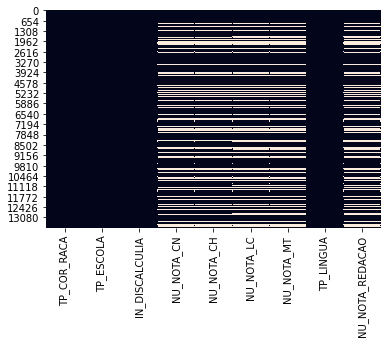

In [8]:
# Verificando os valores nulos no df
sns.heatmap(df[colunas].isnull(), cbar=False)

In [9]:
# Preenchendo os valores nulos por zero
df = df.fillna(0)

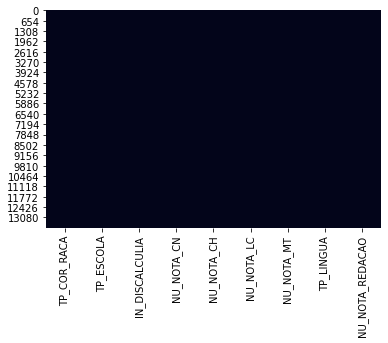

In [10]:
sns.heatmap(df[colunas].isnull(), cbar=False)

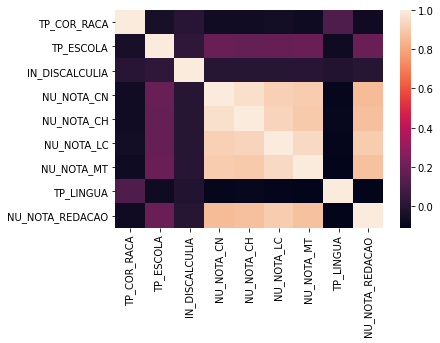

In [11]:
# Plotando um mapa para verificar a correlação entre as variáveis
sns.heatmap(df.corr())

In [23]:
# Lidando com as variáveis categóricas
dict_tp_escola = {1: 'Não Respondeu', 
                  2: 'Pública', 
                  3: 'Privada', 
                  4: 'Exterior'}

dict_cor_raca = {0: 'Não Declarado', 
                1: 'Branca',
                2: 'Preta',
                3: 'Parda',
                4: 'Amarela',
                5: 'Indígena',
                6: 'Não dispões da informação'}

In [24]:
df['TP_ESCOLA'] = df['TP_ESCOLA'].map(dict_tp_escola)
df['TP_COR_RACA'] = df['TP_COR_RACA'].map(dict_cor_raca)

In [25]:
df.head(5)

,TP_COR_RACA,TP_ESCOLA,IN_DISCALCULIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO
0,Branca,Não Respondeu,0,436.3,495.4,581.2,399.4,1,520.0
1,Parda,Pública,0,474.5,544.1,599.0,459.8,1,580.0
2,Parda,Não Respondeu,0,0.0,0.0,0.0,0.0,1,0.0
3,Não Declarado,Não Respondeu,0,0.0,0.0,0.0,0.0,0,0.0
4,Preta,Não Respondeu,0,0.0,0.0,0.0,0.0,1,0.0


In [26]:
df.describe()

,IN_DISCALCULIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000
mean,0.000073,356.621515,398.923911,381.166737,356.092607,0.593664,390.447633
std,0.008534,213.282315,237.174594,234.648409,228.844193,0.491167,267.749316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,365.625000,345.900000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,433.100000,499.600000,486.000000,422.500000,1.000000,480.000000
75%,0.000000,493.200000,564.400000,548.300000,504.400000,1.000000,580.000000
max,1.000000,806.400000,807.000000,763.600000,952.000000,1.000000,1000.000000


In [27]:
df2 = pd.get_dummies(df, prefix=['TP_ESCOLA', 'TP_COR_RACA'])

In [28]:
df2.head(5)

,IN_DISCALCULIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,TP_ESCOLA_Amarela,TP_ESCOLA_Branca,TP_ESCOLA_Indígena,TP_ESCOLA_Não Declarado,TP_ESCOLA_Parda,TP_ESCOLA_Preta,TP_COR_RACA_Exterior,TP_COR_RACA_Não Respondeu,TP_COR_RACA_Privada,TP_COR_RACA_Pública
0,0,436.3,495.4,581.2,399.4,1,520.0,0,1,0,0,0,0,0,1,0,0
1,0,474.5,544.1,599.0,459.8,1,580.0,0,0,0,0,1,0,0,0,0,1
2,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1,0,0,1,0,0
3,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,1,0,0,0,1,0,0
4,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,0,1,0,1,0,0


In [29]:
# Padronizando as notas
for col in df2.columns:
    if 'NU_NOTA' in col:
        mean_col = df2[col].mean()
        std_col = df2[col].std()
        df2[col] = (df2[col] - mean_col) / std_col

In [18]:
# Normalizando as notas
# for col in df2.columns:
#     if 'NU_NOTA' in col:
#         df2[col] = (df2[col] - df2[col].min()) / (df2[col].max() - df2[col].min())

In [30]:
from sklearn import preprocessing

In [31]:
for col in df2.columns:
    if 'NU_NOTA' in col:
            scaler = preprocessing.StandardScaler().fit(df2[[col]])
            df2[col] = scaler.transform(df2[[col]])

In [32]:
df2.describe()

,IN_DISCALCULIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,TP_ESCOLA_Amarela,TP_ESCOLA_Branca,TP_ESCOLA_Indígena,TP_ESCOLA_Não Declarado,TP_ESCOLA_Parda,TP_ESCOLA_Preta,TP_COR_RACA_Exterior,TP_COR_RACA_Não Respondeu,TP_COR_RACA_Privada,TP_COR_RACA_Pública
count,13730.000000,1.373000e+04,1.373000e+04,1.373000e+04,1.373000e+04,13730.000000,1.373000e+04,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000
mean,0.000073,-2.691058e-17,2.380551e-17,2.432302e-17,3.363822e-18,0.593664,-3.726080e-17,0.022724,0.334232,0.007356,0.017553,0.487473,0.130663,0.000073,0.688055,0.041442,0.270430
std,0.008534,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,0.491167,1.000036e+00,0.149028,0.471738,0.085455,0.131324,0.499861,0.337043,0.008534,0.463304,0.199318,0.444198
min,0.000000,-1.672124e+00,-1.682045e+00,-1.624476e+00,-1.556105e+00,0.000000,-1.458311e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.221547e-02,-2.235730e-01,-1.624476e+00,-1.556105e+00,0.000000,-1.458311e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.585917e-01,4.244964e-01,4.467837e-01,2.901966e-01,1.000000,3.344757e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,6.403881e-01,6.977228e-01,7.122970e-01,6.480951e-01,1.000000,7.079729e-01,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,2.108918e+00,1.720635e+00,1.629873e+00,2.604082e+00,1.000000,2.276662e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# Verificando os tipos das colunas, no caso não é necessário fazer nenhum tipo de tratamento e/ou limpeza
df2.dtypes

IN_DISCALCULIA                 int64
NU_NOTA_CN                   float64
NU_NOTA_CH                   float64
NU_NOTA_LC                   float64
NU_NOTA_MT                   float64
TP_LINGUA                      int64
NU_NOTA_REDACAO              float64
TP_ESCOLA_Amarela              uint8
TP_ESCOLA_Branca               uint8
TP_ESCOLA_Indígena             uint8
TP_ESCOLA_Não Declarado        uint8
TP_ESCOLA_Parda                uint8
TP_ESCOLA_Preta                uint8
TP_COR_RACA_Exterior           uint8
TP_COR_RACA_Não Respondeu      uint8
TP_COR_RACA_Privada            uint8
TP_COR_RACA_Pública            uint8
dtype: object

In [34]:
df2.columns

Index(['IN_DISCALCULIA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'NU_NOTA_REDACAO', 'TP_ESCOLA_Amarela',
       'TP_ESCOLA_Branca', 'TP_ESCOLA_Indígena', 'TP_ESCOLA_Não Declarado',
       'TP_ESCOLA_Parda', 'TP_ESCOLA_Preta', 'TP_COR_RACA_Exterior',
       'TP_COR_RACA_Não Respondeu', 'TP_COR_RACA_Privada',
       'TP_COR_RACA_Pública'],
      dtype='object')

In [35]:
# Separando as variáveis independentes(X) e a variáveis dependente(Y)
X = df2[['IN_DISCALCULIA', 
         'NU_NOTA_CN', 
         'NU_NOTA_CH', 
         'NU_NOTA_LC',
         'NU_NOTA_REDACAO', 
         'TP_ESCOLA_Amarela',
         'TP_ESCOLA_Branca', 
         'TP_ESCOLA_Indígena',
         'TP_ESCOLA_Não Declarado',
         'TP_ESCOLA_Parda',
         'TP_ESCOLA_Preta',
         'TP_COR_RACA_Exterior',
         'TP_COR_RACA_Não Respondeu', 
         'TP_COR_RACA_Privada',
         'TP_COR_RACA_Pública'
]]

Y = df2['NU_NOTA_MT']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [37]:
# Dividindo X e Y em dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.30, random_state = 5)

In [38]:
# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(9611, 15) (4119, 15) (9611,) (4119,)


In [39]:
# Treinando o modelo
linR = LinearRegression()
linR.fit(X_treino, Y_treino)

LinearRegression()

In [40]:
# Prevendo e medindo a acurácia do modelo
linR.predict(X_teste)
accuracy = linR.score(X_teste,Y_teste)
print(accuracy * 100, '%')

90.69677444217197 %


In [41]:
# importando os dados de teste, conforme solicitado no desafio
data = pd.read_csv('test.csv')

In [42]:
# Filtrando as colunas correspondentes às variáveis dependentes
colunas = ['TP_COR_RACA',
           'TP_ESCOLA',
           'IN_DISCALCULIA',
           'NU_NOTA_CN', 
           'NU_NOTA_CH', 
           'NU_NOTA_LC', 
           'NU_NOTA_REDACAO']
df3 = data[colunas]

In [43]:
# Preenchendo os valores nulos
df3 = df3.fillna(0)

In [44]:
df3.head(5)

,TP_COR_RACA,TP_ESCOLA,IN_DISCALCULIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,3,1,0,464.8,443.5,431.8,420.0
1,3,1,0,391.1,491.1,548.0,580.0
2,1,2,0,595.9,622.7,613.6,320.0
3,3,1,0,0.0,0.0,0.0,0.0
4,1,2,0,592.9,492.6,571.4,320.0


In [45]:
df3['TP_ESCOLA'] = df3['TP_ESCOLA'].map(dict_tp_escola)
df3['TP_COR_RACA'] = df3['TP_COR_RACA'].map(dict_cor_raca)

In [46]:
df3 = pd.get_dummies(df3, prefix=['TP_ESCOLA', 'TP_COR_RACA'])
df3.columns

Index(['IN_DISCALCULIA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_REDACAO', 'TP_ESCOLA_Amarela', 'TP_ESCOLA_Branca',
       'TP_ESCOLA_Indígena', 'TP_ESCOLA_Não Declarado', 'TP_ESCOLA_Parda',
       'TP_ESCOLA_Preta', 'TP_COR_RACA_Não Respondeu', 'TP_COR_RACA_Privada',
       'TP_COR_RACA_Pública'],
      dtype='object')

In [47]:
df3['TP_ESCOLA_Exterior'] = np.array(0)

In [48]:
df3.columns

Index(['IN_DISCALCULIA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_REDACAO', 'TP_ESCOLA_Amarela', 'TP_ESCOLA_Branca',
       'TP_ESCOLA_Indígena', 'TP_ESCOLA_Não Declarado', 'TP_ESCOLA_Parda',
       'TP_ESCOLA_Preta', 'TP_COR_RACA_Não Respondeu', 'TP_COR_RACA_Privada',
       'TP_COR_RACA_Pública', 'TP_ESCOLA_Exterior'],
      dtype='object')

In [49]:
# Normalizando os dados de teste
for col in df3.columns:
    if 'NU_NOTA' in col:
        mean_col = df3[col].mean()
        std_col = df3[col].std()
        df3[col] = (df3[col] - mean_col) / std_col

In [50]:
# Fazendo a predição 
result = linR.predict(df3)

In [51]:
resposta = pd.DataFrame(data['NU_INSCRICAO']).join(pd.DataFrame(result))
resposta.columns = ['NU_INSCRICAO', 'NU_NOTA_MT']

In [52]:
# Tratando os valores negativos
resposta['NU_NOTA_MT'] = resposta['NU_NOTA_MT'].apply(lambda x: 0 if (x < 0) else x)

In [54]:
# Exportando o resultado como answer.csv
resposta.to_csv(r'/home/guilherme/codenation/enem-2/answer.csv', index=False)